In [14]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata= pd.read_csv(city_data_to_load)
citydata.head()

ridedata=pd.read_csv(ride_data_to_load)
ridedata.head()

color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}


# Combine the data into a single dataset

merged_df=pd.merge(ridedata, citydata, on='city')


# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [16]:

by_city = merged_df.groupby('city')

avg_fare = by_city.mean()['fare']

rides_per_city=by_city.count()['date']
rides_per_city

driver_count = by_city.mean()['driver_count']
driver_count

city_type = citydata.set_index('city')['type']
city_type

city_info = pd.DataFrame({
    "Number of Rides": rides_per_city,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info= city_info.sort_values('Number of Drivers', ascending = False)
city_info

rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']


city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data')

Text(0.5, 0.98, 'Pyber Ride Sharing Data')

<Figure size 432x288 with 0 Axes>

## Bubble Plot of Ride Sharing Data

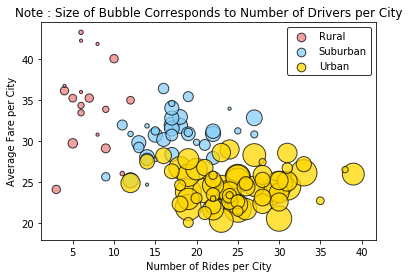

NameError: name 'sns' is not defined

In [20]:
# Obtain the x and y coordinates for each of the three city types

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
# Build the scatter plots for each city types

plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
# Incorporate the other graph properties

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()
# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

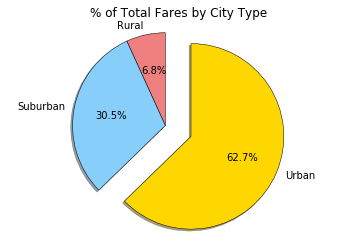

In [21]:
# Calculate Type Percents

by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_sum = by_type.sum()['fare']


labels = fare_sum.index
# Build Pie Chart

colors = [city_color[n] for n in labels]
labels = ["Rural","Suburban","Urban" ]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
# Save Figure

plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

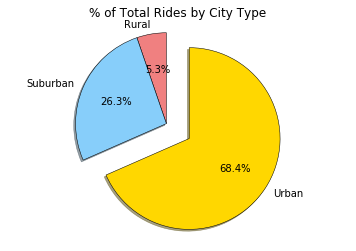

In [12]:
# Calculate Ride Percents

ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
labels = ["Rural","Suburban","Urban" ]
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()
# Build Pie Chart

# Save Figure


In [72]:
# Show Figure
plt.show()

## Total Drivers by City Type

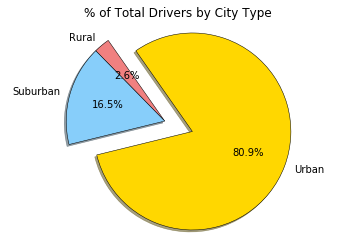

In [67]:
# Calculate Driver Percents

driver_sum = citydata.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()
# Build Pie Charts

# Save Figure


In [73]:
# Show Figure
plt.show()